<a href="https://colab.research.google.com/github/teethavattcp/teethavat_port_data/blob/main/07_RevenueForecasting_04_Lumpy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import time

# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
!pip install pandasql

In [ ]:
import pandasql

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
from pathlib import Path

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import statsmodels.tsa.stattools as smt

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau,TensorBoard

In [ ]:
!pip install pystan

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from sklearn.model_selection import ParameterGrid

#Define fn for cleaning raw data

##count_total_duplicates(df)

In [ ]:
def count_total_duplicates(df):
    # Identifying duplicate rows (excluding the first occurrence)
    duplicates = df.duplicated(keep='first')

    # Summing the number of duplicate rows
    total_duplicates = duplicates.sum()

    return total_duplicates

In [ ]:
# Example usage
data = {
    'A': ['foo', 'bar', 'foo', 'baz', 'foo'],
    'B': ['one', 'one', 'two', 'two', 'one'],
    'C': [1, 2, 3, 4, 1],
    'D': [5, 6, 7, 8, 5]
}
df_test = pd.DataFrame(data)
df_test

,A,B,C,D
0,foo,one,1,5
1,bar,one,2,6
2,foo,two,3,7
3,baz,two,4,8
4,foo,one,1,5


In [ ]:
total_duplicates = count_total_duplicates(df_test)
print(f'Total number of duplicate rows: {total_duplicates}')

Total number of duplicate rows: 1


##check_duplication_in_df(df)

In [ ]:
def check_duplication_in_df(df):
  total_duplicates = count_total_duplicates(df)
  if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate rows in the DataFrame.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows were dropped.")
    print("New shape of dataframe after dropping duplicate rows:",df.shape)
  elif total_duplicates == 0:
    print("No duplicate rows found.")

## format_number(x)

In [ ]:
def format_number(x):
    if isinstance(x, float):
        if x.is_integer():
            return '{:.0f}'.format(x)  # Convert to integer if it's a whole number
        else:
            return '{:.2f}'.format(x)  # Keep as float with 2 decimal places
    return x

## explore_df(df_for_eda)

In [ ]:
def explore_df(df_for_eda):
  print("#Check shape")
  print(df_for_eda.shape,"\n")

  print("#Check duplication")
  check_duplication_in_df(df_for_eda)

  print("\n#Check missing value")
  if df_for_eda.isnull().sum().sum() == 0:
    print("No missing values found.")
  else:
    print("Missing values found:", df_for_eda.isnull().sum().sum())
    print("\nNumber of missing values:\n",df_for_eda.isnull().sum())
    print("\nPercentage of missing values:\n",df_for_eda.isnull().sum()/len(df_for_eda)*100)

  print("\n#Check data type")
  print(df_for_eda.info(),"\n")

  print("\n#Check unique value")
  print(df_for_eda.nunique(),"\n")

  print("#List of column name:\n",df_for_eda.columns.tolist())

## explore_classes_in_df(df,df_col_cat)

In [ ]:
def explore_classes_in_df(df,df_col_cat):
  for col in df_col_cat:
    print ("\n-------- %s --------" % col)
    print (df[col].value_counts())

In [ ]:
def explore_distribution_in_df(df,df_col_num):
  for col in df_col_num:
    #histogram plot
    #plt.figure(figsize=(2.5, 1.25))
    print ("\n-------- %s --------" % col)

    # Create the histogram plot to calculate the max count
    hist = sns.histplot(df[col])

    # Calculate the maximum count (frequency)
    max_count = hist.patches[0].get_height()  # Initialize with the first bar's height
    for bar in hist.patches:
        if bar.get_height() > max_count:
            max_count = bar.get_height()

    # Clear the current plot to redraw with y-axis limit
    plt.clf()

    # Create the histogram plot again
    sns.histplot(df[col])

    # Set the maximum limit for the y-axis
    plt.ylim(top=1.3 * max_count)

    # Display the plot
    plt.title(f'Histogram of {col}')
    plt.show()

    #box plot
    #plt.figure(figsize=(2.5, 1.25))
    plt.clf()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## deepexploredf(df,df_col_cat, df_col_num)

In [ ]:
import matplotlib.cm as cm

In [ ]:
def deepexploredf(df,df_col_cat, df_col_num):
  print("##Explore categorical data")
  if len(df_col_cat) == 0:
    print("No categorical column found.")
  else:
    explore_classes_in_df(df,df_col_cat)

  print("\n##Explore numerical data")
  if len(df_col_num) == 0:
    print("No numerical data found.")
  else:
    print("#Check statistical summary")
    print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())
    print("#Check correlation")
    #plt.figure(figsize = (2,1.25))
    #plt.rcParams.update({'font.size': 10})
    sns.heatmap(df[df_col_num].corr(), annot =True, cmap=cm.coolwarm_r, vmin=-1, vmax=1)
    plt.show()
    #sns.pairplot(df[df_col_num])
    #plt.show()

## export_to_csv(path_of_folder,file_name,df)

In [ ]:
def export_to_csv(path_of_folder,file_name,df):
  filepath = Path(str(path_of_folder)+str(file_name)+'.csv')
  filepath.parent.mkdir(parents=True, exist_ok=True)
  df.to_csv(filepath,mode = 'w', index=False)
  print(str(file_name)+'.csv has been exported successfully.')

In [ ]:
path_folder='/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set'+'/'

## explore_ranges_of_num_field(df,df_col_num)

In [ ]:
def explore_ranges_of_num_field(df,list_col_num):
  for col in df[list_col_num]:
    count_less_than_0_butsmallamount = len(df[(df[col] < 0) & (df[col] > -0.01)]) #-0.01 < value < 0
    count_less_than_0_butlargeamount = len(df[df[col] <= -0.01]) #-0.01 =< value
    count_equal_to_0 = len(df[df[col] == 0])
    count_greater_than_0_but_smallamount = len(df[(df[col] > 0)& (df[col] < 0.01)])
    count_greater_than_0_but_largeamount = len(df[(df[col] >= 0.01)])
    print(col,':')
    print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
    print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
    print(f'Count of values = 0: {count_equal_to_0}')
    print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
    print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
    print('\n')

## add_status_column(df, left_col, right_col, status_col='status')

Add a status column to the DataFrame based on the comparison of two columns from left and right DataFrames.
```
 Parameters:
    - df (pd.DataFrame): The DataFrame resulting from an outer join.
    - left_col (str): The column name from the left DataFrame.
    - right_col (str): The column name from the right DataFrame.
    - status_col (str): The name of the new status column. Default is 'status'.

 Returns:
    - pd.DataFrame: The DataFrame with the added status column.

```


In [ ]:
def add_status_column(df, left_col, right_col, status_col='status'):
    conditions = [
        (df[left_col].notna()) & (df[right_col].notna()),  # Found value in both tables
        (df[left_col].notna()) & (df[right_col].isna()),   # Found value only in the left table
        (df[left_col].isna()) & (df[right_col].notna())    # Found value only in the right table
    ]

    choices = ['Found in both', 'Found only in left', 'Found only in right']

    df[status_col] = pd.Series(np.select(conditions, choices, default=None))
    return df

## dict_k2v_v2k(input_dict):

In [ ]:
def dict_k2v_v2k(input_dict):
  output_dict = {}

  for data_type, columns in input_dict.items():
    for column in columns:
        output_dict[column] = data_type

  return output_dict

## replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace)

In [ ]:
def replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace):
  if df[col_key_name] in dict_kv_replace.keys():
    df[col_val_name] = dict_kv_replace[df[col_key_name]]
  return df

## calculate_mape(actual, forecast)

In [ ]:
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual))*100

## calculate_rmse(actual, forecast)

In [ ]:
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((actual - forecast) ** 2))

## MAPE(Y_actual,Y_Predicted) [for RNN]

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

## create_dataset(dataset, time_step=1)

In [ ]:
# Function to prepare data for RNN model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Prepare datasets

## Import data

### df_fact_trans

In [ ]:
df_fact_trans = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/fact_trans_x_couponredempt.csv', delimiter=",")
df_fact_trans = df_fact_trans.rename(columns={'PRODUCT_ID_x': 'PRODUCT_ID'})
df_fact_trans = df_fact_trans[['DAY','PRODUCT_ID','SALES_VALUE']]
df_fact_trans

,DAY,PRODUCT_ID,SALES_VALUE
0,51,825123,3.99
1,51,831447,2.99
2,51,840361,1.09
3,51,845307,3.71
4,51,852014,2.79
...,...,...,...
2581261,708,1109947,3.19
2581262,708,1117514,1.99
2581263,708,8019186,2.59
2581264,708,15596705,2.77


### df_product_master

In [ ]:
df_product_master = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/dim_product_master.csv', delimiter=",")
df_product_master = df_product_master[['PRODUCT_ID','demand_pattern']]
df_product_master

,PRODUCT_ID,demand_pattern
0,25671,Lumpy
1,26081,Smooth
2,26093,Smooth
3,26190,Smooth
4,26355,Smooth
...,...,...
92010,18293142,Smooth
92011,18293439,Smooth
92012,18293696,Smooth
92013,18294080,Smooth


### df_qtyforecast_lumpy

In [ ]:
df_qtyforecast_lumpy = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/05_DemandForecasting/Forecast_qty_04_Lumpy.csv', delimiter=",")
df_qtyforecast_lumpy

,DAY_ID,PRODUCT_ID,QUANTITY
0,700,820165,7
1,700,822407,2
2,700,823704,1
3,700,823758,1
4,700,824555,2
...,...,...,...
30608,820,9677202,1
30609,820,10285144,1
30610,820,12263788,1
30611,820,12301109,1


### df_date

In [ ]:
df_date = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/00_dim_date_withforecast.csv', delimiter=",")
df_date = df_date[['DAY_ID','TRANS_date']]
df_date

,DAY_ID,TRANS_date
0,1,2001-01-01
1,2,2001-01-02
2,3,2001-01-03
3,4,2001-01-04
4,5,2001-01-05
...,...,...
815,816,2003-03-27
816,817,2003-03-28
817,818,2003-03-29
818,819,2003-03-30


Tuning model period: DAY 1-699 [699]

Forecasting period: DAY 700-820 [121]

In [ ]:
explore_classes_in_df(df_product_master,['demand_pattern'])


-------- demand_pattern --------
demand_pattern
Intermittent    54232
Smooth          33939
Lumpy            3741
Erratic           103
Name: count, dtype: int64


## Seperate imported data by demand pattern = 'Lumpy'

In [ ]:
list_productid_Lumpy = list(df_product_master[df_product_master['demand_pattern'] == 'Lumpy']['PRODUCT_ID'])
print(list_productid_Lumpy)

[25671, 27159, 28304, 30870, 34873, 41481, 42385, 42721, 43907, 44599, 46663, 50140, 50150, 58826, 64842, 68011, 70028, 70302, 75914, 78986, 79442, 83647, 85357, 85989, 89840, 94550, 96261, 97125, 97206, 100189, 113901, 117872, 126853, 127187, 133138, 133533, 144212, 159082, 163779, 169517, 170316, 190639, 202364, 238885, 257851, 262712, 262910, 301126, 309997, 350312, 355985, 384912, 395432, 409508, 420326, 435635, 441607, 443545, 492628, 564474, 591931, 679538, 733764, 751280, 759943, 781537, 819063, 819089, 819097, 819227, 819255, 819302, 819308, 819518, 819594, 819765, 819845, 819918, 820075, 820082, 820160, 820165, 820518, 820560, 821138, 821465, 821562, 821730, 821845, 821895, 821930, 822140, 822241, 822339, 822346, 822407, 822677, 822936, 823098, 823641, 823704, 823758, 823793, 823850, 823990, 824037, 824256, 824303, 824555, 824642, 825180, 825226, 825343, 825490, 825550, 825618, 825682, 825882, 825970, 826144, 826150, 826243, 826272, 826385, 826606, 826609, 826790, 826833, 8269

### df_fact_trans_Lumpy

In [ ]:
df_fact_trans_Lumpy = df_fact_trans[df_fact_trans['PRODUCT_ID'].isin(list_productid_Lumpy)]
df_fact_trans_Lumpy

,DAY,PRODUCT_ID,SALES_VALUE
7,51,912676,1.49
10,51,958046,1.59
11,51,977545,1.00
15,51,1043064,1.09
16,51,1055201,1.49
...,...,...,...
2581232,704,9245106,3.30
2581245,708,825180,1.79
2581247,708,882305,3.00
2581262,708,1117514,1.99


## Aggregate data

###df_sales_by_day

Aggregating total quantities by day helps to capture the overall demand trend and seasonal effects.

In [ ]:
df_sales_by_day = df_fact_trans_Lumpy.groupby('DAY')['SALES_VALUE'].sum().reset_index()
df_sales_by_day

,DAY,SALES_VALUE
0,1,76.36
1,2,42.73
2,3,245.07
3,4,310.16
4,5,183.76
...,...,...
705,707,1599.57
706,708,1417.55
707,709,2028.82
708,710,1894.07


In [ ]:
#Filter only data < Dec [DAY <700]
df_sales_by_day = df_sales_by_day[df_sales_by_day['DAY'] < 700]
df_sales_by_day

,DAY,SALES_VALUE
0,1,76.36
1,2,42.73
2,3,245.07
3,4,310.16
4,5,183.76
...,...,...
693,695,1440.25
694,696,1714.11
695,697,2202.01
696,698,2442.61


####df_sales_by_date

In [ ]:
#Join DAY with date field
df_sales_by_date = df_sales_by_day.merge(df_date[df_date['DAY_ID']<700], left_on='DAY', right_on ='DAY_ID', how='outer')
df_sales_by_date['SALES_VALUE'] = df_sales_by_date['SALES_VALUE'].fillna(0)
df_sales_by_date = df_sales_by_date[['DAY_ID','TRANS_date','SALES_VALUE']]
df_sales_by_date = df_sales_by_date.sort_values(by='DAY_ID').reset_index(drop=True)
df_sales_by_date = df_sales_by_date.set_index('TRANS_date')
df_sales_by_date

,DAY_ID,SALES_VALUE
TRANS_date,,
2001-01-01,1,76.36
2001-01-02,2,42.73
2001-01-03,3,245.07
2001-01-04,4,310.16
2001-01-05,5,183.76
...,...,...
2002-11-26,695,1440.25
2002-11-27,696,1714.11
2002-11-28,697,2202.01


### df_forecastqty_by_day_product
Aggregating quantities by product and computing the percentage of total revenue helps in understanding the relative revenue share of each product.

In [ ]:
df_qtyforecast_lumpy

,DAY_ID,PRODUCT_ID,QUANTITY
0,700,820165,7
1,700,822407,2
2,700,823704,1
3,700,823758,1
4,700,824555,2
...,...,...,...
30608,820,9677202,1
30609,820,10285144,1
30610,820,12263788,1
30611,820,12301109,1


In [ ]:
df_forecastqty_by_day_product = df_qtyforecast_lumpy.copy()
# Group by DAY_ID and calculate the total quantity for each day
df_forecastqty_by_day_product['Total_Quantity_per_Day'] = df_forecastqty_by_day_product.groupby('DAY_ID')['QUANTITY'].transform('sum')

# Calculate Percent_product_share
df_forecastqty_by_day_product['Percent_product_share'] = (df_forecastqty_by_day_product['QUANTITY'] / df_forecastqty_by_day_product['Total_Quantity_per_Day'])

# Drop the intermediate column if no longer needed
df_forecastqty_by_day_product.drop(columns=['Total_Quantity_per_Day'], inplace=True)

df_forecastqty_by_day_product

,DAY_ID,PRODUCT_ID,QUANTITY,Percent_product_share
0,700,820165,7,0.010101
1,700,822407,2,0.002886
2,700,823704,1,0.001443
3,700,823758,1,0.001443
4,700,824555,2,0.002886
...,...,...,...,...
30608,820,9677202,1,0.001443
30609,820,10285144,1,0.001443
30610,820,12263788,1,0.001443
30611,820,12301109,1,0.001443


In [ ]:
df_forecastqty_by_day_product[df_forecastqty_by_day_product['DAY_ID'] == 700]['Percent_product_share'].sum()

1.0000000000000002

In [ ]:
df_forecastqty_by_day_product['Percent_product_share'].describe()

,Percent_product_share
count,30613.000000
mean,0.003953
std,0.034773
min,0.001443
25%,0.001443
50%,0.001443
75%,0.001443
max,0.555556


# EDA Timeseries component

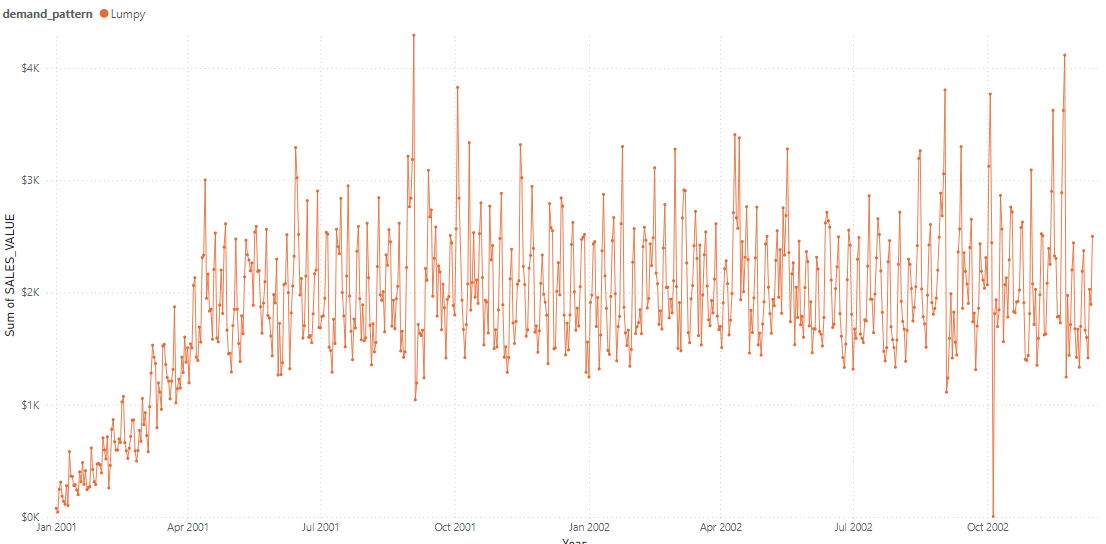

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df_sales_by_date['SALES_VALUE'], model='additive', period=30)

In [ ]:
# Extract decomposed components
df_sales_by_date['trend'] = decomposition.trend
df_sales_by_date['seasonal'] = decomposition.seasonal
df_sales_by_date['residual'] = decomposition.resid

In [ ]:
# Interpolate to handle NaNs in decomposed components
df_sales_by_date['trend'] = df_sales_by_date['trend'].fillna(0.1)
df_sales_by_date['seasonal'] = df_sales_by_date['seasonal'].fillna(0.1)
df_sales_by_date['residual'] = df_sales_by_date['residual'].fillna(0.1)

##Result

In [ ]:
df_sales_by_date

,DAY_ID,SALES_VALUE,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,76.36,0.1,-158.829662,0.1
2001-01-02,2,42.73,0.1,-73.502390,0.1
2001-01-03,3,245.07,0.1,-100.229776,0.1
2001-01-04,4,310.16,0.1,-64.030882,0.1
2001-01-05,5,183.76,0.1,35.105974,0.1
...,...,...,...,...,...
2002-11-26,695,1440.25,0.1,35.105974,0.1
2002-11-27,696,1714.11,0.1,124.196512,0.1
2002-11-28,697,2202.01,0.1,-142.794049,0.1


In [ ]:
df_sales_by_date.describe()

,DAY_ID,SALES_VALUE,trend,seasonal,residual
count,699.000000,699.000000,699.000000,699.000000,699.000000
mean,350.000000,1876.561259,1823.073780,-0.858384,-0.766061
std,201.928205,672.393177,554.615274,112.046345,445.244072
min,1.000000,0.000000,0.100000,-239.719359,-1910.042148
25%,175.500000,1545.630000,1948.068833,-70.634996,-300.905752
50%,350.000000,1868.250000,2011.687333,3.717224,-54.008944
75%,524.500000,2304.465000,2099.441667,92.365853,244.691972
max,699.000000,4293.730000,2221.362333,184.437145,2031.870488


In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_sales_by_date.index, y=df_sales_by_date['trend'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of trend time series component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_sales_by_date.index, y=df_sales_by_date['seasonal'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of seasonal component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Create a figure
fig = go.Figure()

# Add the trend line
fig.add_trace(go.Scatter(x=df_sales_by_date.index, y=df_sales_by_date['residual'], mode='lines', name='Trend'))

# Update the layout
fig.update_layout(
    title='Plot of residual component',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)

# Show the plot
fig.show()

In [ ]:
# Perform ADF test on the residuals
adf_result = smt.adfuller(df_sales_by_date['SALES_VALUE'])
# Display ADF test results
print('ADF Statistic (Residuals):', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Decision based on p-value
if adf_result[1] <= 0.05:
    print("The residual component is stationary (reject null hypothesis).")
else:
    print("The residual component is non-stationary (fail to reject null hypothesis).")

ADF Statistic (Residuals): -3.79925427425148
p-value: 0.002914953964759973
Critical Values:
   1%: -3.4400317565062455
   5%: -2.8658123184971576
   10%: -2.56904513726821
The residual component is stationary (reject null hypothesis).


From time series components, the time series patterns are trend, seasonality and stationary.

# Model Training

In [ ]:
training_ratio = 0.8

## Naive Method

In [ ]:
# Split data into training and testing sets
train_size = int(len(df_sales_by_date) * training_ratio)  # 80% training data
train, test = df_sales_by_date[['DAY_ID','SALES_VALUE']].iloc[:train_size], df_sales_by_date[['DAY_ID','SALES_VALUE']].iloc[train_size:]

In [ ]:
train

,DAY_ID,SALES_VALUE
TRANS_date,,
2001-01-01,1,76.36
2001-01-02,2,42.73
2001-01-03,3,245.07
2001-01-04,4,310.16
2001-01-05,5,183.76
...,...,...
2002-07-09,555,1757.44
2002-07-10,556,1747.03
2002-07-11,557,2235.50


In [ ]:
# Naive Forecasting: Use the last observation from the training set
last_SALES_VALUE_train = train['SALES_VALUE'].iloc[-1]

In [ ]:
# Forecast for the test set
test_forecast = pd.DataFrame({
    'DAY_ID': test['DAY_ID'],
    'FORECAST_SALES_VALUE': last_SALES_VALUE_train,
    'ACTUAL_SALES_VALUE': test['SALES_VALUE']
})

### Evaluate model accuracy

Because there is an actual SALES_VALUE as 0, then normalize RMSE (nRMSE) is used to evaluate model accuracy

In [ ]:
mean_sales_naive = test_forecast['FORECAST_SALES_VALUE'].mean()
mean_sales_naive

1940.5599999999997

In [ ]:
rmse_naive = calculate_rmse(test_forecast['ACTUAL_SALES_VALUE'], test_forecast['FORECAST_SALES_VALUE'])
rmse_naive

611.6635572261695

In [ ]:
print(f'nRMSE: {rmse_naive/mean_sales_naive}')

nRMSE: 0.31519950799056434


##Prophet

The column renaming is required because Prophet expects the input DataFrame to have specific column names:

- ds (datestamp): This column represents the date or time of the observation. Prophet requires the time series to have a ds column where the dates are stored.

- y (value): This column contains the target variable (i.e., the values you want to forecast). Prophet expects the target variable to be in a column named y.

In [ ]:
df_sales_by_date

,DAY_ID,SALES_VALUE,trend,seasonal,residual
TRANS_date,,,,,
2001-01-01,1,76.36,0.1,-158.829662,0.1
2001-01-02,2,42.73,0.1,-73.502390,0.1
2001-01-03,3,245.07,0.1,-100.229776,0.1
2001-01-04,4,310.16,0.1,-64.030882,0.1
2001-01-05,5,183.76,0.1,35.105974,0.1
...,...,...,...,...,...
2002-11-26,695,1440.25,0.1,35.105974,0.1
2002-11-27,696,1714.11,0.1,124.196512,0.1
2002-11-28,697,2202.01,0.1,-142.794049,0.1


In [ ]:
df_data = df_sales_by_date.reset_index().copy()
df_data = df_data[['TRANS_date','SALES_VALUE']]
df_data.rename(columns={'TRANS_date': 'ds', 'SALES_VALUE': 'y'}, inplace=True)
df_data

,ds,y
0,2001-01-01,76.36
1,2001-01-02,42.73
2,2001-01-03,245.07
3,2001-01-04,310.16
4,2001-01-05,183.76
...,...,...
694,2002-11-26,1440.25
695,2002-11-27,1714.11
696,2002-11-28,2202.01
697,2002-11-29,2442.61


In [ ]:
# Train-Test Split at 80%
train_size = int(len(df_data) * 0.8)
train_df = df_data.iloc[:train_size]
test_df = df_data.iloc[train_size:]

In [ ]:
# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi53x9ff3/uy2mb1va.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi53x9ff3/8rnei_6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6077', 'data', 'file=/tmp/tmpi53x9ff3/uy2mb1va.json', 'init=/tmp/tmpi53x9ff3/8rnei_6o.json', 'output', 'file=/tmp/tmpi53x9ff3/prophet_modelb709ra8a/prophet_model-20240831144222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions on the test set
future_test = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast_test = model.predict(future_test.iloc[:len(test_df)])

In [ ]:
# Extract predictions for the test set
predictions_test = forecast_test['yhat'].values

### Evaluate model performance

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['y'], predictions_test))
mean_actual_test = test_df['y'].mean()
normalized_rmse = rmse / mean_actual_test
print(f'Normalized RMSE: {normalized_rmse}')

Normalized RMSE: 0.5816036155182097


Poorer performance than naive forecasting method.

## XGB Regressor

In [ ]:
df_data_xgb = df_sales_by_date.reset_index().copy()
df_data_xgb = df_data_xgb[['TRANS_date','DAY_ID','SALES_VALUE']]
# Convert TRANS_date to datetime
df_data_xgb['TRANS_date'] = pd.to_datetime(df_data_xgb['TRANS_date'])
# Create additional features
df_data_xgb['year'] = df_data_xgb['TRANS_date'].dt.year
df_data_xgb['month'] = df_data_xgb['TRANS_date'].dt.month
df_data_xgb['day_of_week'] = df_data_xgb['TRANS_date'].dt.dayofweek
df_data_xgb['day_of_year'] = df_data_xgb['TRANS_date'].dt.dayofyear
df_data_xgb

,TRANS_date,DAY_ID,SALES_VALUE,year,month,day_of_week,day_of_year
0,2001-01-01,1,76.36,2001,1,0,1
1,2001-01-02,2,42.73,2001,1,1,2
2,2001-01-03,3,245.07,2001,1,2,3
3,2001-01-04,4,310.16,2001,1,3,4
4,2001-01-05,5,183.76,2001,1,4,5
...,...,...,...,...,...,...,...
694,2002-11-26,695,1440.25,2002,11,1,330
695,2002-11-27,696,1714.11,2002,11,2,331
696,2002-11-28,697,2202.01,2002,11,3,332
697,2002-11-29,698,2442.61,2002,11,4,333


In [ ]:
# Features and Target
X_xgb = df_data_xgb[['DAY_ID', 'year', 'month', 'day_of_week', 'day_of_year']]
y_xgb = df_data_xgb['SALES_VALUE']

In [ ]:
# Train-test split (0.8)
split_index = int(0.8 * len(df_data_xgb))
X_train_xgb, X_test_xgb = X_xgb [:split_index], X_xgb [split_index:]
y_train_xgb, y_test_xgb = y_xgb [:split_index], y_xgb [split_index:]

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBRegressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_xgb, y_train_xgb)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
# Train the model with best parameters
model_xgb_best = grid_search.best_estimator_

y_pred_xgb = model_xgb_best.predict(X_test_xgb)

### Evaluate model performance

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
normalized_rmse_xgb = rmse_xgb / y_test_xgb.mean()
print(f"Normalized RMSE: {normalized_rmse_xgb }")

Normalized RMSE: 0.21051756406097805


## AutoARIMA

AutoARIMA is a function that automates the process of fitting an ARIMA or SARIMA model by automatically selecting the best parameters (p, d, q) based on the given time series data. The goal is to minimize the error metric (such as AIC or BIC) to choose the best model without requiring manual intervention, saving time and effort from traditional ARIMA or SARIMA, especially for complex datasets.

Key Features:
- Automatic Parameter Selection: Automatically selects the optimal values for p (AR order), d (differencing order), and q (MA order).
- Automates Stationarity and Seasonality Checks: It automatically performs differencing if needed to make the time series stationary, and tests for seasonality, sometimes leading to SARIMA-like models.
- Performance Metrics: Uses criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to select the model with the best fit.
- Built-in Cross-Validation: Some implementations support cross-validation, ensuring the model generalizes well.

In [ ]:
df_data_arima = df_data.copy()
df_data_arima.set_index('ds', inplace=True)
df_data_arima

,y
ds,
2001-01-01,76.36
2001-01-02,42.73
2001-01-03,245.07
2001-01-04,310.16
2001-01-05,183.76
...,...
2002-11-26,1440.25
2002-11-27,1714.11
2002-11-28,2202.01


In [ ]:
# Train-Test Split at 80%
train_size_ARIMA = int(len(df_data_arima) * 0.8)
train_df_ARIMA = df_data_arima.iloc[:train_size]
test_df_ARIMA = df_data_arima.iloc[train_size:]

In [ ]:
# Fit the AutoARIMA model
model_ARIMA = auto_arima(train_df_ARIMA['y'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8547.572, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8523.831, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8447.980, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8545.596, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8460.717, Time=0.32 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=8441.901, Time=2.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=8455.981, Time=2.37 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=8396.266, Time=8.70 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=8397.626, Time=3.34 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=12.54 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=8410.897, Time=5.46 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=8535.250, Time=1.38 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=8353.509, Time=11.07 sec
 ARIMA(1,1,1)(1,0,1)[12] in

Best Model based on the lowest AIC value.: The ARIMA(5,1,2)(0,0,2)[12]
- AR Order (p): 5
- Differencing Order (d): 1
- MA Order (q): 2
- Seasonal AR Order (P): 0
- Seasonal Differencing Order (D): 0
- Seasonal MA Order (Q): 2
- Seasonality: 12 periods (monthly data with yearly seasonality)

In [ ]:
len(test_df_ARIMA)

140

In [ ]:
# Forecast on the test set
n_test_periods = len(test_df_ARIMA)
forecast = model_ARIMA.predict(n_test_periods)

### Evaluate model performance

In [ ]:
rmse_ARIMA = np.sqrt(mean_squared_error(test_df_ARIMA['y'], forecast))
mean_actual_test_ARIMA = test_df_ARIMA['y'].mean()
normalized_rmse_ARIMA = rmse_ARIMA / mean_actual_test_ARIMA
print(f'Normalized RMSE: {normalized_rmse_ARIMA}')

Normalized RMSE: 0.3200959291770413


## Long Short-Term Memory (LSTM)

In [ ]:
# Set train-test split at 80%
train_size = int(len(df_sales_by_date) * 0.8)
test_size = len(df_sales_by_date) - train_size
train, test = df_sales_by_date.iloc[0:train_size], df_sales_by_date.iloc[train_size:len(df_sales_by_date)]

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['SALES_VALUE']])
test_scaled = scaler.transform(test[['SALES_VALUE']])

In [ ]:
# Prepare the dataset for LSTM
time_step = 3  # Choosing time step of 3 for LSTM
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [ ]:
# Reshape the input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation = 'tanh',return_sequences=True, input_shape=(time_step, 1)))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(64, activation = 'tanh',return_sequences=True, input_shape=(time_step, 1)))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(64, activation = 'tanh',return_sequences=True, input_shape=(time_step, 1)))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(32, activation = 'tanh'))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(Dense(1,activation = 'linear'))
modelLSTM.compile(loss='mse',optimizer='adam',metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
modelLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 3, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 3, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,393 (372.63 KB)

 Trainable params: 95,393 (372.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
checkpoint = ModelCheckpoint('best_LSTMmodel.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-8, verbose=1)

In [ ]:
hist_LSTM = modelLSTM.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32,
                    callbacks=[checkpoint, early_stopping, reduce_lr], verbose=1)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 277ms/step - loss: 0.1708 - mse: 0.1708 - val_loss: 0.0436 - val_mse: 0.0436 - learning_rate: 0.0010
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0311 - val_mse: 0.0311 - learning_rate: 0.0010
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0212 - val_mse: 0.0212 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0244 - val_mse: 0.0244 - learning_rate: 0.0010
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0243 - val_mse: 0.0243 - learning_rate: 0.0010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0192 - mse: 0.0192
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0251 - val_mse: 0.0251 - learning_rate: 0.0010
Epoch 

In [ ]:
hist_dict_LSTM = hist_LSTM.history
hist_dict_LSTM

{'loss': [0.1358928680419922,
  0.026863666251301765,
  0.023990651592612267,
  0.02169199101626873,
  0.020380204543471336,
  0.02015524171292782,
  0.02006407640874386,
  0.01886390708386898,
  0.019294824451208115,
  0.01937825232744217,
  0.01963893696665764,
  0.019751079380512238,
  0.01891336962580681],
 'mse': [0.1358928680419922,
  0.026863666251301765,
  0.023990651592612267,
  0.02169199101626873,
  0.020380204543471336,
  0.02015524171292782,
  0.02006407640874386,
  0.01886390708386898,
  0.019294824451208115,
  0.01937825232744217,
  0.01963893696665764,
  0.019751079380512238,
  0.01891336962580681],
 'val_loss': [0.04360581934452057,
  0.031066080555319786,
  0.02115912176668644,
  0.024427741765975952,
  0.024256207048892975,
  0.025116194039583206,
  0.024300232529640198,
  0.024754835292696953,
  0.02475513517856598,
  0.02491745352745056,
  0.024973062798380852,
  0.02502281963825226,
  0.025027213618159294],
 'val_mse': [0.04360581934452057,
  0.031066080555319786,

Text(0, 0.5, 'Loss')

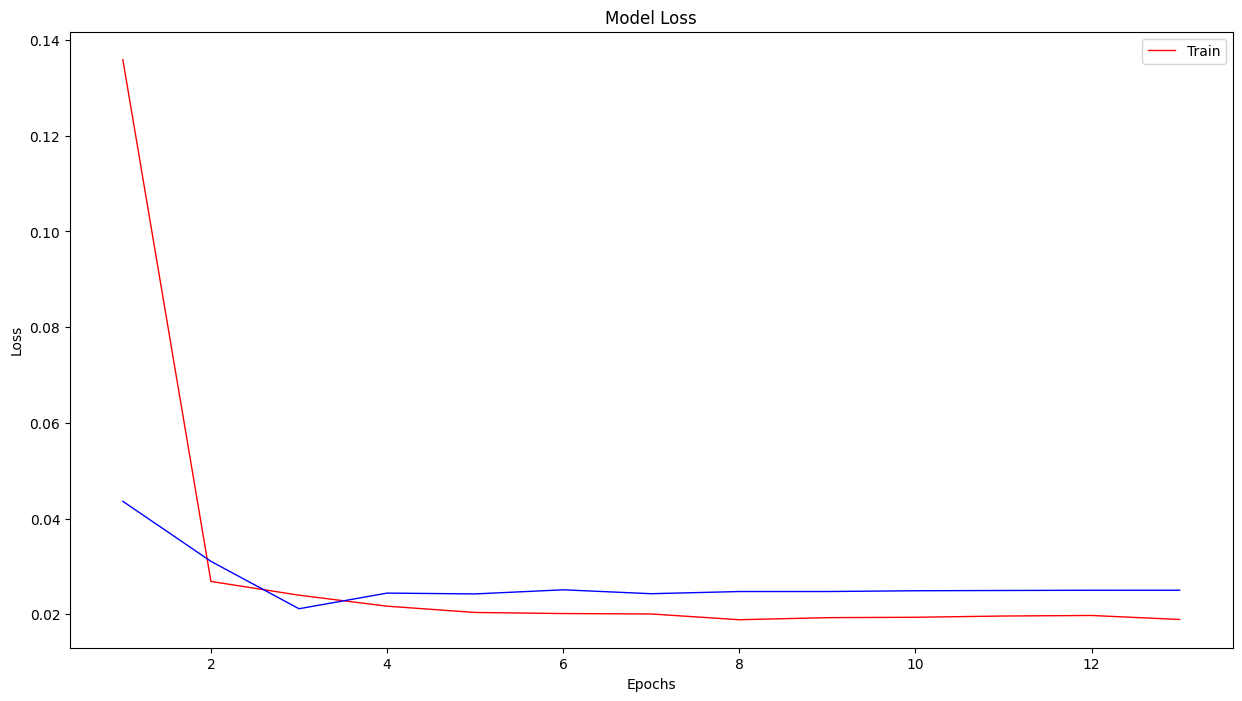

In [ ]:
loss_values = hist_dict_LSTM['loss']
val_loss_values = hist_dict_LSTM['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss_values, color='red', linewidth=1, markersize=2)
plt.plot(epochs, val_loss_values, color='blue', linewidth=1, markersize=2)
plt.title('Model Loss')
plt.legend(['Train'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

**Summary:**

This LSTM model shows good initial learning behavior, but it also indicates potential overfitting as training progresses.
- Both training and validation loss decrease initially, indicating that the model is learning well from the data. The steep decrease in the first few epochs is typical in deep learning models as they quickly adjust to the data.
- The training loss continues to decrease steadily, but the validation loss reaches a plateau and even starts to slightly increase or fluctuate after a few epochs. This divergence suggests that the model might be starting to overfit the training data.
- Around the 4th epoch, the validation loss stops decreasing significantly and begins to fluctuate, indicating that the model's generalization to unseen data is no longer improving.


In [ ]:
modelLSTM.load_weights('best_LSTMmodel.keras')

In [ ]:
# Predictions for training and testing sets
train_predict = modelLSTM.predict(X_train)
test_predict = modelLSTM.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
# Inverse transform predictions and actual values for comparison
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

###Evaluate model

In [ ]:
test_predict.shape

(136, 1)

In [ ]:
rmse_LSTM = np.sqrt(mean_squared_error(y_test_actual[0], test_predict[:, 0]))
mean_test_actual_LSTM = np.mean(y_test_actual[0])
normalized_rmse_LSTM = rmse_LSTM / mean_test_actual_LSTM
print(f"Normalized RMSE: {normalized_rmse_LSTM }")

Normalized RMSE: 0.2970757346111384


In [ ]:
y_test_actual

array([[2.30851e+03, 2.65826e+03, 2.51699e+03, 2.19309e+03, 1.82319e+03,
        1.47652e+03, 1.39038e+03, 1.50830e+03, 2.27461e+03, 2.46215e+03,
        1.69458e+03, 1.58016e+03, 1.50898e+03, 1.33471e+03, 1.57653e+03,
        2.25234e+03, 2.71531e+03, 1.92147e+03, 1.74237e+03, 1.67418e+03,
        1.38712e+03, 1.66230e+03, 2.29770e+03, 2.25009e+03, 2.03559e+03,
        1.74610e+03, 1.86825e+03, 2.05136e+03, 2.41817e+03, 3.19517e+03,
        3.26400e+03, 2.03170e+03, 1.78426e+03, 1.72108e+03, 1.51183e+03,
        1.97739e+03, 2.42432e+03, 2.60658e+03, 1.91023e+03, 1.80613e+03,
        1.85827e+03, 1.95031e+03, 2.19941e+03, 2.49386e+03, 2.88570e+03,
        2.68386e+03, 3.05790e+03, 3.80639e+03, 1.11201e+03, 1.23839e+03,
        1.59190e+03, 1.98914e+03, 1.41684e+03, 1.82544e+03, 1.55696e+03,
        1.44288e+03, 2.36251e+03, 2.56620e+03, 3.29979e+03, 1.85936e+03,
        2.35501e+03, 2.18866e+03, 2.07561e+03, 1.90365e+03, 2.40158e+03,
        2.65307e+03, 1.73800e+03, 1.81607e+03, 1.31

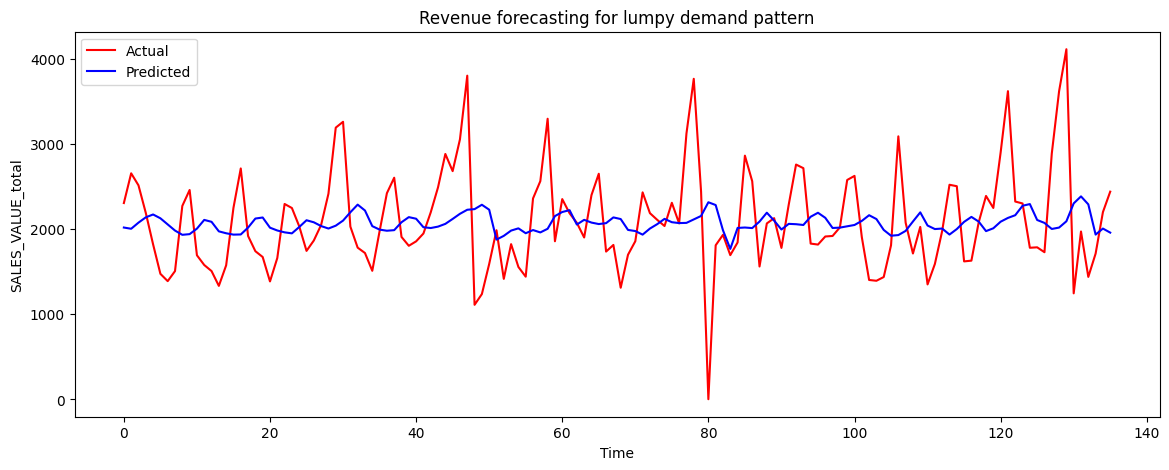

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test_actual[0], color = 'red', label = 'Actual')
plt.plot(test_predict, color = 'blue', label = 'Predicted')
plt.title('Revenue forecasting for lumpy demand pattern')
plt.xlabel('Time')
plt.ylabel('SALES_VALUE_total')
plt.legend()
plt.show()

In [ ]:
test_predict

array([[2020.6359],
       [2006.2606],
       [2078.051 ],
       [2140.4553],
       [2174.2495],
       [2129.3523],
       [2057.3613],
       [1985.1   ],
       [1935.1096],
       [1943.0939],
       [2007.8431],
       [2110.396 ],
       [2087.915 ],
       [1975.8472],
       [1953.2925],
       [1937.2943],
       [1939.2838],
       [2019.9297],
       [2126.3477],
       [2138.6873],
       [2018.9526],
       [1985.9095],
       [1964.1083],
       [1952.2037],
       [2026.5764],
       [2106.4514],
       [2082.2998],
       [2037.8473],
       [2008.952 ],
       [2042.5216],
       [2102.2603],
       [2200.1453],
       [2289.9905],
       [2220.8743],
       [2037.1731],
       [1996.4281],
       [1983.062 ],
       [1989.9296],
       [2082.825 ],
       [2143.0479],
       [2124.2605],
       [2024.281 ],
       [2014.8164],
       [2031.5012],
       [2063.784 ],
       [2121.8264],
       [2182.1924],
       [2229.7388],
       [2237.149 ],
       [2288.577 ],


In [ ]:
# Flatten the arrays if needed
y_test_actual_flat = y_test_actual.flatten()
test_predict_flat = test_predict.flatten()

# Create the figure
fig = go.Figure()

# Add the actual values trace
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test_actual_flat)),  # Use indices as x-axis values
    y=y_test_actual_flat,
    mode='lines',
    name='Actual',
    line=dict(color='red')
))

# Add the predicted values trace
fig.add_trace(go.Scatter(
    x=np.arange(len(test_predict_flat)),  # Use indices as x-axis values
    y=test_predict_flat,
    mode='lines',
    name='Predicted',
    line=dict(color='blue')
))

# Update the layout with titles and labels
fig.update_layout(
    title='Demand Forecasting for Lumpy Demand Pattern',
    xaxis_title='Time',
    yaxis_title='SALES_VALUE_total',
    legend_title='Legend',
    width=1000,  # Equivalent to figsize=(14, 5) in inches
    height=500
)

# Show the plot
fig.show()

## Mean substitution

In [ ]:
print(f"Normalized RMSE with avg value: {np.sqrt(mean_squared_error(y_test_actual[0], np.full((136, 1), 1558, dtype=int)[:, 0]))/ mean_test_actual_LSTM}")

Normalized RMSE with avg value: 0.38469626261977236


# Forecast Revenue

### Forecast future values from 2002-12-01 to 2003-03-31

Use result from XGB Regressor which achieves lowest nRMSE

In [ ]:
# Generate future DAY_IDs for forecasting (from 700 to 820)
future_day_ids = np.arange(700, 821)

# Create a DataFrame for future dates
df_future = pd.DataFrame({'DAY_ID': future_day_ids})

# Generate the corresponding dates based on the DAY_ID, assuming DAY_ID is sequential
# Here we'll assume the last date in your dataset corresponds to the last DAY_ID in your training data
last_known_date = df_data_xgb['TRANS_date'].iloc[-1]
last_known_day_id = df_data_xgb['DAY_ID'].iloc[-1]

# Calculate the difference in days
days_ahead = df_future['DAY_ID'] - last_known_day_id

# Generate future dates by adding these days to the last known date
df_future['TRANS_date'] = last_known_date + pd.to_timedelta(days_ahead, unit='D')

# Create additional features for the future dates
df_future['year'] = df_future['TRANS_date'].dt.year
df_future['month'] = df_future['TRANS_date'].dt.month
df_future['day_of_week'] = df_future['TRANS_date'].dt.dayofweek
df_future['day_of_year'] = df_future['TRANS_date'].dt.dayofyear

In [ ]:
# Use the same features as in training for prediction
X_future = df_future[['DAY_ID', 'year', 'month', 'day_of_week', 'day_of_year']]

# Forecast using the best model
y_pred_future = model_xgb_best.predict(X_future)

# Combine the predictions with the future dates
forecast_df = df_future.copy()
forecast_df['Predicted_SALES_VALUE'] = y_pred_future

forecast_df = forecast_df[['TRANS_date','DAY_ID','Predicted_SALES_VALUE']]
forecast_df = forecast_df.rename(columns={'Predicted_SALES_VALUE': 'SALES_VALUE_total'})

forecast_df

,TRANS_date,DAY_ID,SALES_VALUE_total
0,2002-12-01,700,1563.129028
1,2002-12-02,701,1660.634399
2,2002-12-03,702,1683.425781
3,2002-12-04,703,1896.747681
4,2002-12-05,704,2499.996582
...,...,...,...
116,2003-03-27,816,2451.414795
117,2003-03-28,817,2674.617432
118,2003-03-29,818,2104.854736
119,2003-03-30,819,1803.122559


## Disagregate forecast sales by forecasted demand product_id

In [ ]:
df_forecastqty_by_day_product

,DAY_ID,PRODUCT_ID,QUANTITY,Percent_product_share
0,700,820165,7,0.010101
1,700,822407,2,0.002886
2,700,823704,1,0.001443
3,700,823758,1,0.001443
4,700,824555,2,0.002886
...,...,...,...,...
30608,820,9677202,1,0.001443
30609,820,10285144,1,0.001443
30610,820,12263788,1,0.001443
30611,820,12301109,1,0.001443


In [ ]:
list_of_day = list(forecast_df['DAY_ID'])

In [ ]:
filtered_df = forecast_df[forecast_df['DAY_ID'] == 700].copy()
merged_df = pd.merge(filtered_df, df_forecastqty_by_day_product[df_forecastqty_by_day_product['DAY_ID']==700][['PRODUCT_ID','Percent_product_share']], how='cross')
merged_df['SALES_VALUE'] = merged_df['SALES_VALUE_total'] * merged_df['Percent_product_share']
merged_df = merged_df[['DAY_ID','PRODUCT_ID','SALES_VALUE']]
merged_df

,DAY_ID,PRODUCT_ID,SALES_VALUE
0,700,820165,15.789182
1,700,822407,4.511195
2,700,823704,2.255597
3,700,823758,2.255597
4,700,824555,4.511195
...,...,...,...
248,700,9677202,2.255597
249,700,10285144,2.255597
250,700,12263788,2.255597
251,700,12301109,2.255597


In [ ]:
merged_df[['SALES_VALUE']].sum()

,0
SALES_VALUE,1563.129028


In [ ]:
merged_df[['SALES_VALUE']].describe()

,SALES_VALUE
count,253.000000
mean,6.178376
std,54.461690
min,2.255597
25%,2.255597
50%,2.255597
75%,2.255597
max,868.405016


1563.129028

In [ ]:
df_forecast_sales = pd.DataFrame()
for day in list_of_day:
  filtered_df = forecast_df[forecast_df['DAY_ID'] == day].copy()
  merged_df = pd.merge(filtered_df, df_forecastqty_by_day_product[df_forecastqty_by_day_product['DAY_ID']==day][['PRODUCT_ID','Percent_product_share']], how='cross')
  merged_df['SALES_VALUE'] = merged_df['SALES_VALUE_total'] * merged_df['Percent_product_share']
  merged_df = merged_df[['DAY_ID','PRODUCT_ID','SALES_VALUE']]
  df_forecast_sales = pd.concat([df_forecast_sales, merged_df], axis=0)
df_forecast_sales

,DAY_ID,PRODUCT_ID,SALES_VALUE
0,700,820165,15.789182
1,700,822407,4.511195
2,700,823704,2.255597
3,700,823758,2.255597
4,700,824555,4.511195
...,...,...,...
248,820,9677202,2.560237
249,820,10285144,2.560237
250,820,12263788,2.560237
251,820,12301109,2.560237


In [ ]:
export_to_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/07_RevenueForecasting/','Forecast_revenue_04_Lumpy', df_forecast_sales )

Forecast_revenue_04_Lumpy.csv has been exported successfully.
